# PRML Assignment 5

### Aim: Write a script to implement Naïve Bayes Classifier for the given Dataset to support the following: 

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

C:\Users\Deena\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"C:\Users\Deena\Downloads\germand credit card\german_credit_data.csv")

skiprows = 1,
                 names = ['status of bank acc', 'duration', 'credit history', 'purpose', 'credit amount',
                          'savings account', 'employment', 'installment rate', 'personal status',
                         'other applicant', 'present residence', 'property', 'age', 'other installment', 
                         'housing', 'number of existing credits', 'job', 'no of people',
                         'telephone', 'foreign worker']

In [3]:
df = pd.read_csv(r"C:\Users\Deena\Desktop\PDEU\datasets\german.data",
                 sep=" ")

In [4]:
df.head()

,status_of_bank,acc_duration,credit_history,purpose,credit_amount,savings_account,employment,installment_rate,personal_status,other_applicant,...,property,age,other_installment,housing,number_of_existingcredits,job,no_of_people,telephone,foreign_worker,output
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
df.dtypes

status_of_bank               object
acc_duration                  int64
credit_history               object
purpose                      object
credit_amount                 int64
savings_account              object
employment                   object
installment_rate              int64
personal_status              object
other_applicant              object
present_residence             int64
property                     object
age                           int64
other_installment            object
housing                      object
number_of_existingcredits     int64
job                          object
no_of_people                  int64
telephone                    object
foreign_worker               object
output                        int64
dtype: object

<AxesSubplot:>

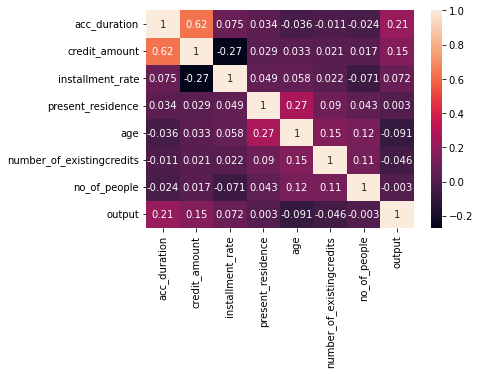

In [6]:
sns.heatmap(data=df.corr(), annot=True)

In [7]:
label_encoder = preprocessing.LabelEncoder()

In [8]:
list1 = ['status_of_bank', 'credit_history', 'purpose', 'savings_account', 
          'employment', 'personal_status', 'other_applicant', 'property',
          'other_installment', 'housing', 'job', 'telephone', 'foreign_worker']

In [9]:
df1 = df.copy()

In [10]:
def ft(col):
    df1[col] = label_encoder.fit_transform(df1[col])

In [11]:
for i in list1:
    ft(i)

In [12]:
df1.head()

,status_of_bank,acc_duration,credit_history,purpose,credit_amount,savings_account,employment,installment_rate,personal_status,other_applicant,...,property,age,other_installment,housing,number_of_existingcredits,job,no_of_people,telephone,foreign_worker,output
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


In [13]:
df1.dtypes

status_of_bank               int32
acc_duration                 int64
credit_history               int32
purpose                      int32
credit_amount                int64
savings_account              int32
employment                   int32
installment_rate             int64
personal_status              int32
other_applicant              int32
present_residence            int64
property                     int32
age                          int64
other_installment            int32
housing                      int32
number_of_existingcredits    int64
job                          int32
no_of_people                 int64
telephone                    int32
foreign_worker               int32
output                       int64
dtype: object

In [14]:
X = df1.drop('output', axis=1)
X.head()

,status_of_bank,acc_duration,credit_history,purpose,credit_amount,savings_account,employment,installment_rate,personal_status,other_applicant,present_residence,property,age,other_installment,housing,number_of_existingcredits,job,no_of_people,telephone,foreign_worker
0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0
1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0
2,3,12,4,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0
3,0,42,2,3,7882,0,3,2,2,2,4,1,45,2,2,1,2,2,0,0
4,0,24,3,0,4870,0,2,3,2,0,4,3,53,2,2,2,2,2,0,0


In [15]:
Y = df1['output']
Y

0      1
1      2
2      1
3      1
4      2
      ..
995    1
996    1
997    1
998    2
999    1
Name: output, Length: 1000, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Exercise 1: Support for both categorical and ordered features.
### Exercise 2: Support for both discrete and continuous ordered features.

In [17]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

In [18]:
nb_pred = nbc.predict(X_test)

### Exercise 3: Perform SVC and Logistic Regression


In [19]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [20]:
svc_pred = svc.predict(X_test)

In [22]:
svc.score(X_test, y_test)

0.715

In [24]:
lrc = LogisticRegression(solver = 'liblinear')
lrc.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [25]:
lrc_pred = lrc.predict(X_test)

In [26]:
lrc.score(X_test, y_test)

0.775

### Exercise 4: Compare results with Naïve Bayes in terms of Accuracy, F1-Score, Precision, Recall, and AUC


In [27]:
def performance(y_true, y_pred, model):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    prec = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    auc = roc_auc_score(y_true, y_pred)
    return acc,f1,prec,recall,auc

In [28]:
nbc1 = performance(y_test, nb_pred, 'Naïve Bayes') 
svc1 = performance(y_test, svc_pred, 'SVC') 
lrc1 = performance(y_test, lrc_pred, 'Logistic Regression') 

In [29]:
temp = [nbc1, svc1, lrc1]
temp

[(0.71, 0.7159972426470589, 0.7254773758159088, 0.71, 0.6760427936050006),
 (0.715, 0.6138519146531016, 0.7248214285714286, 0.715, 0.5218776295227792),
 (0.775, 0.764298323036187, 0.763854895104895, 0.775, 0.6925712225027046)]

In [30]:
temp[0][0]

0.71

In [31]:
accs = []
f1s = []
precs = []
recalls = []
aucs = []
names = ['Naive Bayes', 'SVM', 'Logistic Reg']

In [32]:
for i in range(len(temp)):
    accs.append(temp[i][0])
    f1s.append(temp[i][1])
    precs.append(temp[i][2])
    recalls.append(temp[i][3])
    aucs.append(temp[i][4])

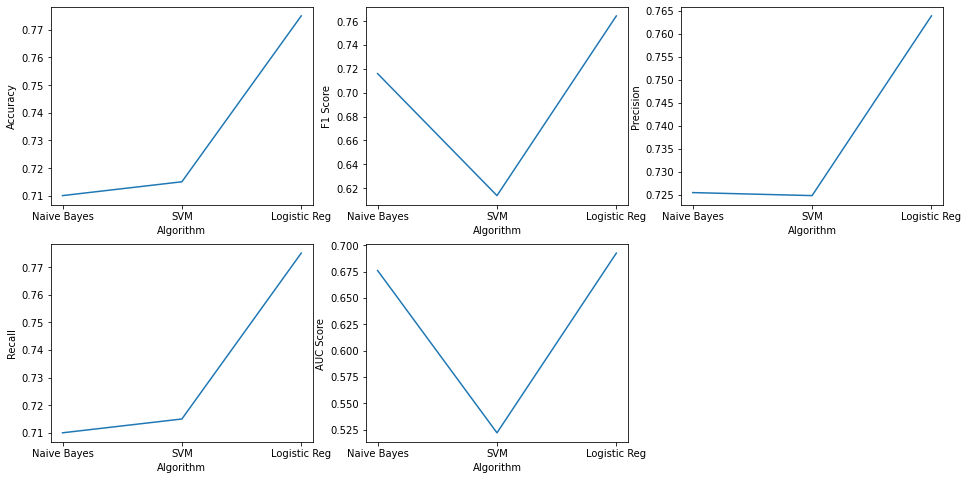

In [33]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.plot(names, accs)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")

plt.subplot(2,3,2)
plt.plot(names, f1s)
plt.xlabel("Algorithm")
plt.ylabel("F1 Score")

plt.subplot(2,3,3)
plt.plot(names, precs)
plt.xlabel("Algorithm")
plt.ylabel("Precision")

plt.subplot(2,3,4)
plt.plot(names, recalls)
plt.xlabel("Algorithm")
plt.ylabel("Recall")

plt.subplot(2,3,5)
plt.plot(names, aucs)
plt.xlabel("Algorithm")
plt.ylabel("AUC Score")
plt.show()

### Exercise 5: From Exercise 4, analyze which model turns out to be overfitting and why?  
#### Here NBC might be overfitting becasue its training accuracy is greater than the testing accuracy.

In [34]:
svc_train_pred = svc.predict(X_train)
nbc_train_pred = nbc.predict(X_train)

In [35]:
svc_test_pred = svc.predict(X_test)
nbc_test_pred = nbc.predict(X_test)

In [36]:
def comparison(yt, yp, dataset):
    accuracy = accuracy_score(yt, yp)
    f1 = f1_score(yt, yp)
    precision = precision_score(yt, yp)
    recall = recall_score(yt, yp)
    
    print("Accuracy :",dataset, accuracy)
    print()

In [37]:
# on SVM data
comparison(y_train, svc_train_pred, "SVM Training Data")
comparison(y_test, svc_test_pred, " SVM Testing Data")

# on NBC data
comparison(y_train, nbc_train_pred, "NBC Training Data")
comparison(y_test, nbc_test_pred, " NBC Testing Data")

Accuracy : SVM Training Data 0.7075

Accuracy :  SVM Testing Data 0.715

Accuracy : NBC Training Data 0.74125

Accuracy :  NBC Testing Data 0.71

